# 모듈 가져오기 (IMPORT 단계)

In [2]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro

#ARIMA
from statsmodels.tsa.arima_model import ARIMA



#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#데이터 scaling => 거리기반 알고리즘은 필수!!!
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

## 데이터 받아오기

In [4]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_MACHINE_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)

In [5]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_PROCESS_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [6]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_TAT_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

In [7]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_PROCESS.drop(["JUDGE","PANEL_ID","LOT_ID","PANEL_ID","TIME_1BLACK","TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df_raw_y = MFG_PROCESS["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [8]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 70)
train data Y size:(2787,)
test data X size:(1195, 70)
test data Y size:(1195,)


In [9]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합


y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.999
Score on test set: 0.951
Confusion matrix: 
[[1056   28]
 [  31   80]]


In [11]:
# cross_val_score(tree_final, df_test_x, df_test_y)

In [12]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
15,AG_RTD_TEMP_GLASS_OUT,0.378
23,BUS_DEVELOP_TEMP_TANK2,0.177
22,BUS_DEVELOP_TEMP_TANK1,0.030
41,DIELEC_FIRE_EXHAUST_HEAT5,0.025
0,BLACK_RTD_TEMP_GLASS_START,0.023
...,...,...
33,DIELEC_FIRE_TEMP_KEEP_CH01,0.000
30,BUS_FIRE_TEMP_ANEAL_CH01,0.000
29,BUS_FIRE_TEMP_KEEP_CH03,0.000
16,AG_RTD_TEMP_HOOD_START,0.000


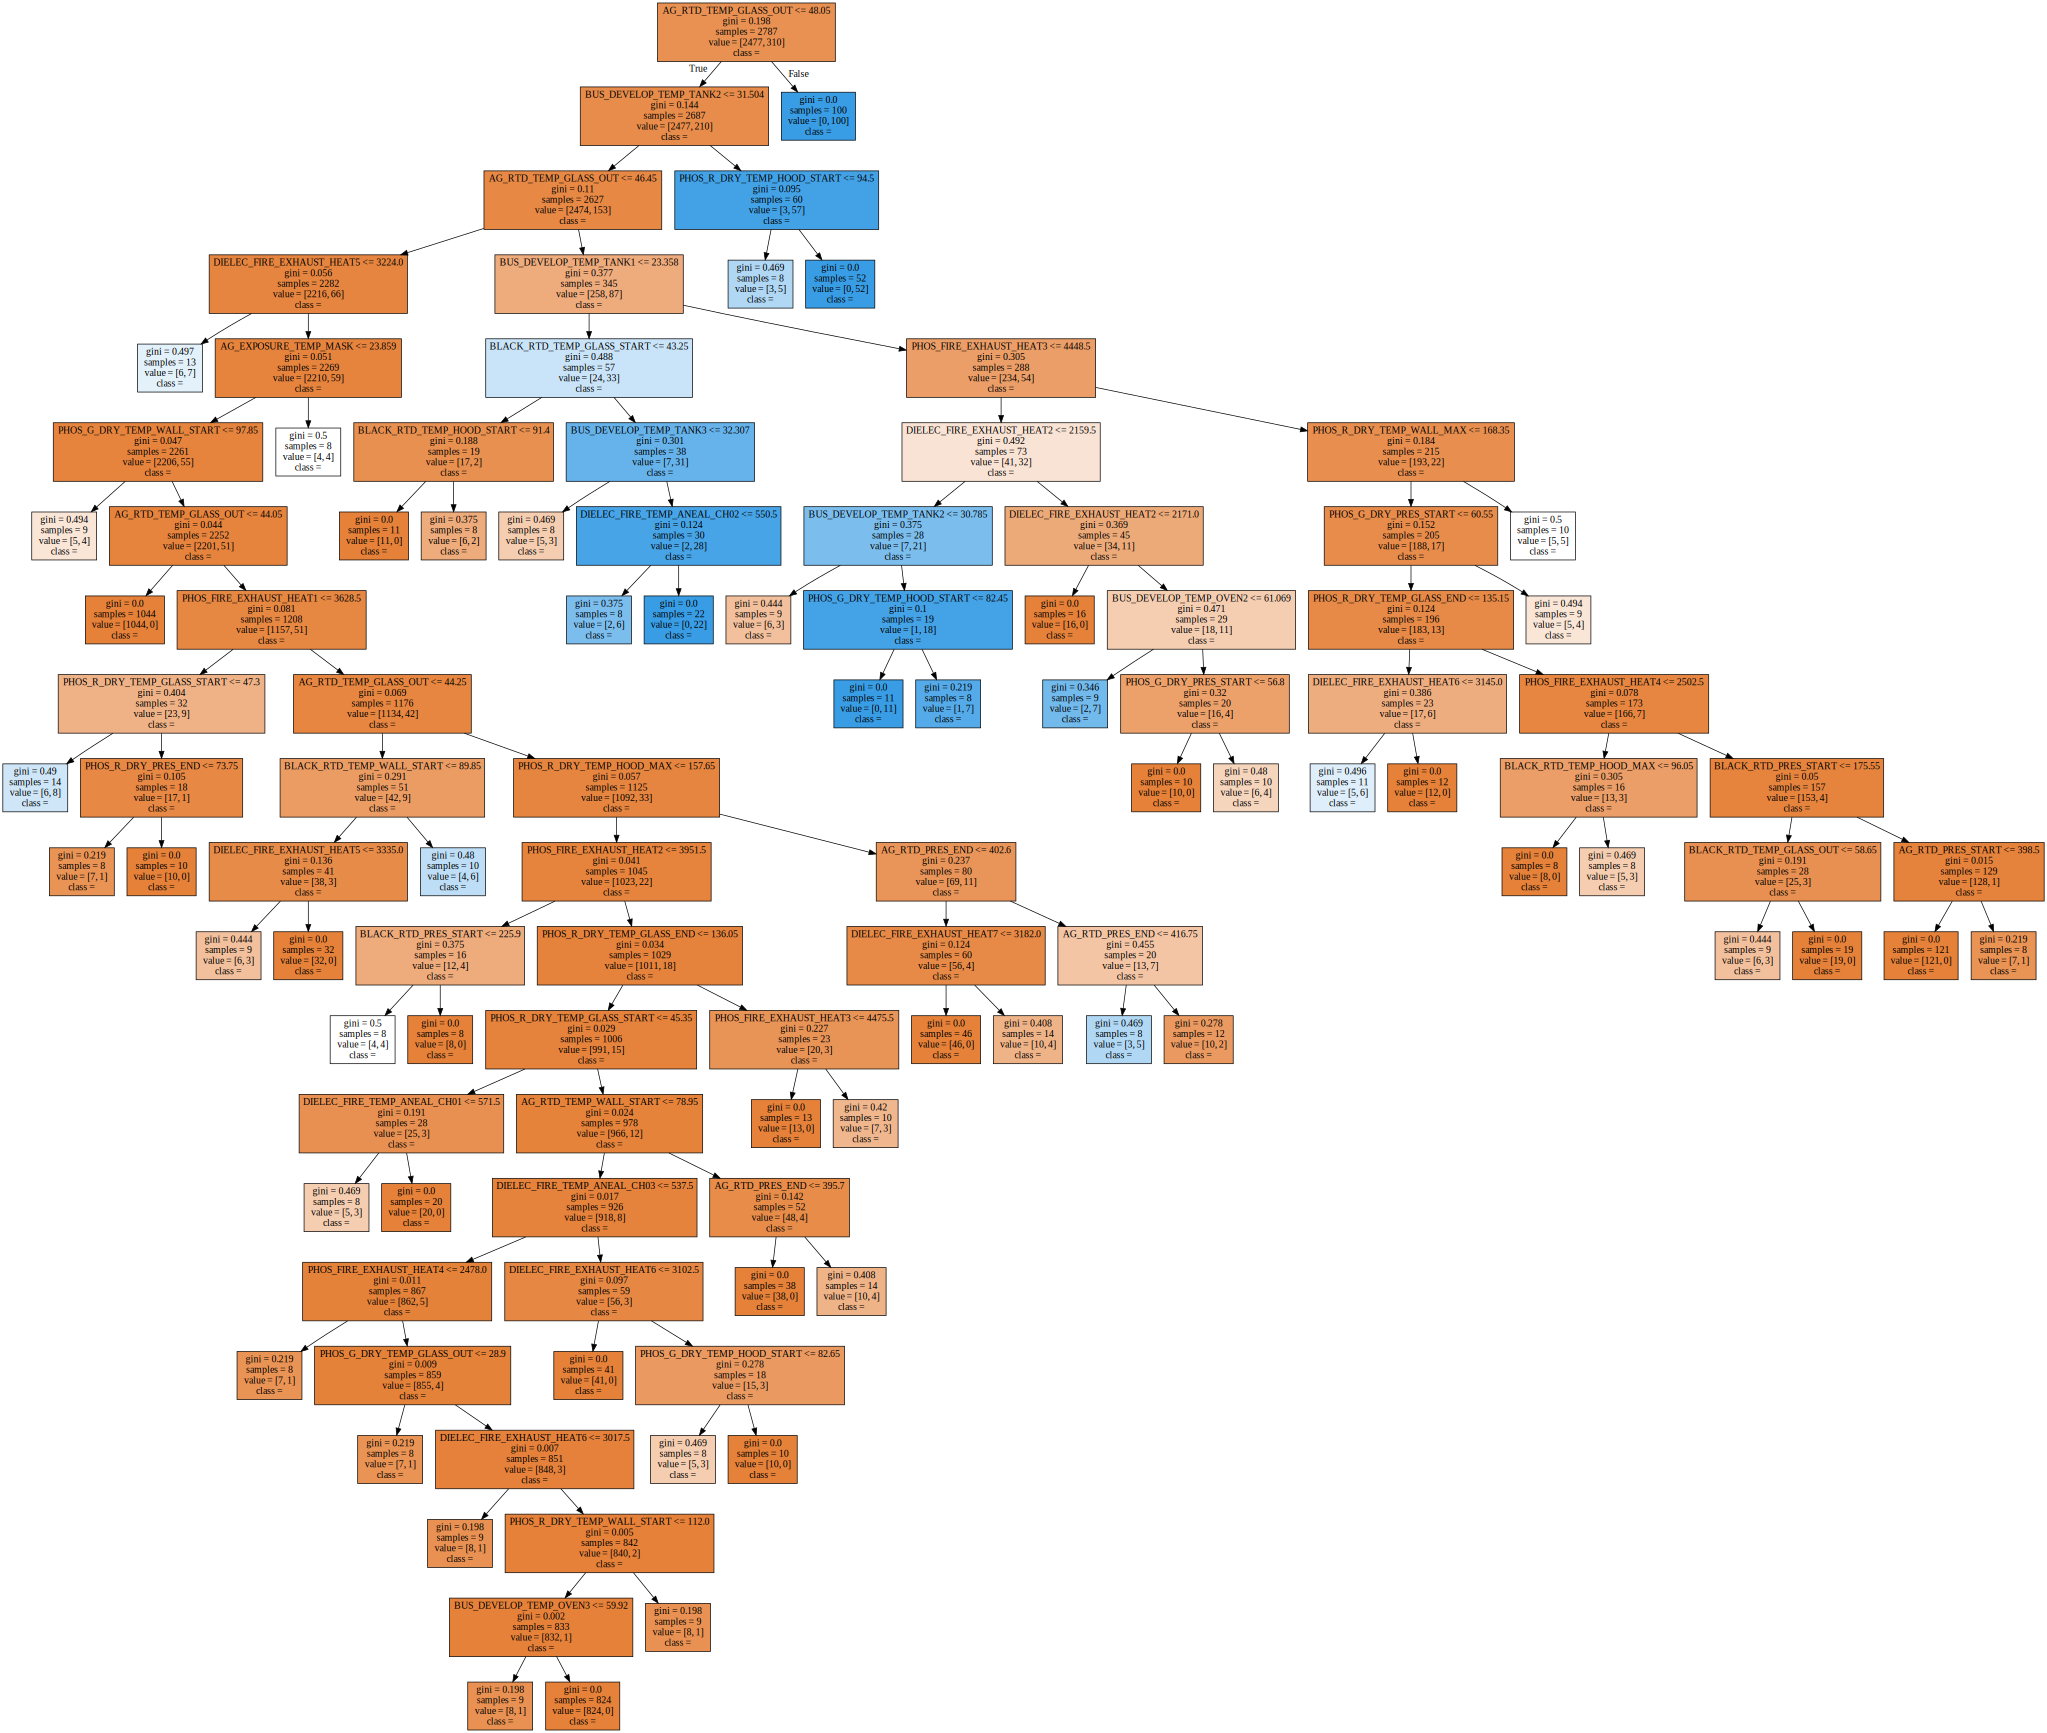

In [16]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!